In [7]:
# basics
import pandas as pd
import numpy as np

# astronomical units and constants
import astropy.units as u
from astropy.constants import R_sun


# matplotlib
from matplotlib.ticker import FormatStrFormatter
from matplotlib.container import ErrorbarContainer
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

font = {'family' : 'courier',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

from mpl_toolkits.axes_grid1 import make_axes_locatable

# data management
import os
CWD = "/".join(os.getcwd().split("/")[:-2])


# modulation model
from funcs.model import FlareModulator#, full_model_coupled, aflare_decoupled, aflare

from altaipony.lcio import from_mast

In [5]:
lcs = pd.read_csv(f"{CWD}/data/summary/lcs.csv")
lcs

,Unnamed: 0,ID,QCS,typ,cadence_min,mission,prefix,origin,h_mission,SpT,...,kmag,e_kmag,i_mu,i_sigma,dist_bailerjones_pc_50,dist_bailerjones_pc_16,dist_bailerjones_pc_84,dist_bailerjones_lowerr,dist_bailerjones_uperr,dist_bailerjones_meanerr
0,0,237880881,1,slc,2,tess,TIC,generic,TESS,M5,...,10.636,0.023,0.371856,0.040246,46.007478,45.863449,46.152398,0.144029,0.144920,0.144474
1,1,44984200,10,slc,2,tess,TIC,custom,TESS,M6,...,9.268,0.021,0.578452,0.028256,11.103263,11.075669,11.130991,0.027593,0.027729,0.027661
2,2,277539431,12,slc,2,tess,TIC,custom,TESS,M7,...,9.666,0.024,1.520214,0.041615,13.700897,13.594101,13.809354,0.106796,0.108457,0.107627
3,3,452922110,7,slc,2,tess,TIC,generic,TESS,M6,...,10.865,0.021,0.860933,0.061087,22.025957,21.964488,22.087766,0.061470,0.061808,0.061639


In [43]:
lab = "TIC 44984200"
flc = from_mast(lab, c=10, mission ="TESS", cadence="short")

Found cached file /home/ekaterina/.lightkurve-cache/mastDownload/TESS/tess2019085135100-s0010-0000000044984200-0140-s/tess2019085135100-s0010-0000000044984200-0140-s_lc.fits with expected size 1920960.
4% (815/18900) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
4% (815/18900) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony/lcio.py:114: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/.lightkurve-cache/mastDownload/TESS/tess2019085135100-s0010-0000000044984200-0140-s/tess2019085135100-s0010-0000000044984200-0140-s_lc.fits' mode='rb' closefd=True>
  c)


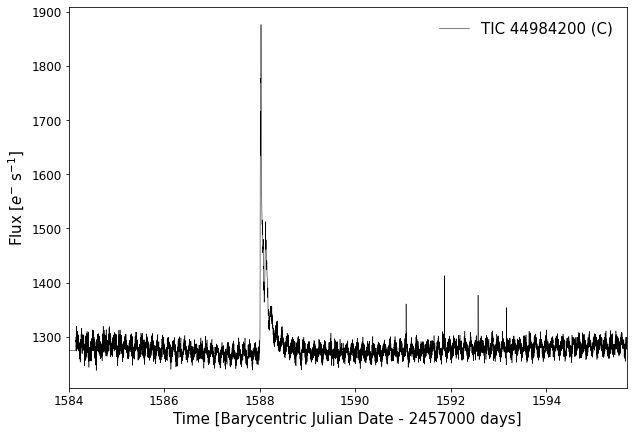

In [46]:
plt.figure(figsize=(10,7))
plt.plot(flc.time, flc.flux, label=f"{lab} (C)", c="k", linewidth=.5)
plt.legend(frameon=False, loc=1)
plt.xlim(1584,flc.time[-1])
# plt.xlim(flc.time[0],flc.time[-1])
# plt.xlim(flc.time[0],1338.2)
# plt.xlim(1640,1648)
# plt.xlim(flc.time[0],1500)
plt.ylabel(r"Flux [$e^{-}$ s$^{-1}$]")
plt.xlabel(f"Time [Barycentric Julian Date - 2457000 days]")
# plt.yscale("log")
plt.savefig(f"../plots/xmm_newton/{lab}_view.png", dpi=300)